In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from matplotlib.image import imread
import string
import shutil
import cv2
import random

In [2]:
img_shape=35

In [10]:
list_image=os.listdir(r"C:\Users\Grégoire\Documents\programmation\opencv\data_font")
len(list_image)

13526

In [11]:
random.shuffle(list_image)
list_train=[list_image[i] for i in range(int(len(list_image)*0.8))]
len(list_train)

10820

In [12]:
list_test=[i for i in list_image if i not in list_train]
len(list_test)


2706

In [13]:
X_train=np.zeros((len(list_train),img_shape,img_shape))
for i in range(len(list_train)):
    img=imread("./data_font/{}".format(list_train[i]))
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            X_train[i,x,y]=img[x,y]

In [14]:
X_test=np.zeros((len(list_test),img_shape,img_shape))
for i in range(len(list_test)):
    img=imread("./data_font/{}".format(list_test[i]))
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            X_test[i,x,y]=img[x,y]

In [15]:
y_train=[n[0] for n in list_train]
y_train[:9]

['E', 'E', 'k', 'j', 'G', 'p', 'f', 'h', 'I']

In [16]:
y_test=[n[0] for n in list_test]
y_test[:9]

['z', 'j', 's', 'o', 'e', 't', 'Y', 'Q', 'L']

f


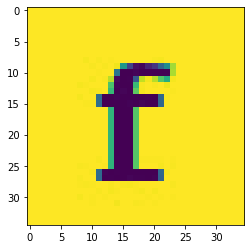

In [17]:
plt.imshow(X_train[557])
print(y_train[557])

G


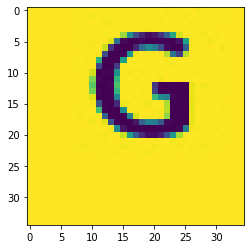

In [18]:
plt.imshow(X_test[559])
print(y_test[559])

In [19]:
X_test=X_test/255
X_train=X_train/255

In [20]:
X_train_f=X_train.reshape((len(list_train),img_shape,img_shape,1))

In [21]:
X_test_f=X_test.reshape((len(list_test),img_shape,img_shape,1))

In [22]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()

y_train=lb.fit_transform(y_train)
y_test=lb.transform(y_test)

print(y_train.shape)
print(y_test.shape)

(10820, 52)
(2706, 52)


In [23]:
model = Sequential()

## Premier set de couches

# Couche convolutive
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(img_shape,img_shape,1), activation='relu',))
# Couche de Pooling
model.add(MaxPool2D(pool_size=(2, 2)))

## Second set de couches

# Couche convolutive
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32), activation='relu',))
# Couche de Pooling
model.add(MaxPool2D(pool_size=(2, 2)))

# Images applaties de 28 par 28 à 764 avant la couche finale
model.add(Flatten())

# 256 neurones dans la couche cachée dense (Vous pouvez changer ce nombre de neurones)
model.add(Dense(256, activation='relu'))

# La dernière est le classificateur, donc 10 classes possibles
model.add(Dense(52, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               295168    
_________________________________________________________________
dense_1 (Dense)              (None, 52)                1

In [25]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [26]:
model.fit(X_train_f,y_train,epochs=50,validation_data=(X_test_f,y_test),callbacks=[early_stop])

Epoch 1/50
339/339 [==============================] - 12s 32ms/step - loss: 2.1146 - accuracy: 0.4573 - val_loss: 1.6554 - val_accuracy: 0.5510
Epoch 2/50
339/339 [==============================] - 11s 31ms/step - loss: 0.7273 - accuracy: 0.8069 - val_loss: 0.6112 - val_accuracy: 0.8304
Epoch 3/50
339/339 [==============================] - 10s 31ms/step - loss: 0.4842 - accuracy: 0.8701 - val_loss: 0.5854 - val_accuracy: 0.8385
Epoch 4/50
339/339 [==============================] - 10s 30ms/step - loss: 0.3888 - accuracy: 0.8908 - val_loss: 0.4862 - val_accuracy: 0.8777
Epoch 5/50
339/339 [==============================] - 10s 31ms/step - loss: 0.3405 - accuracy: 0.9046 - val_loss: 0.4283 - val_accuracy: 0.8902
Epoch 6/50
339/339 [==============================] - 10s 31ms/step - loss: 0.3083 - accuracy: 0.9131 - val_loss: 0.4890 - val_accuracy: 0.8740
Epoch 7/50
339/339 [==============================] - 10s 30ms/step - loss: 0.2879 - accuracy: 0.9192 - val_loss: 0.4359 - val_accuracy:

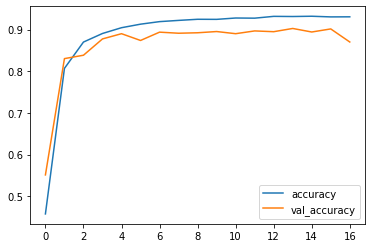

In [27]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()


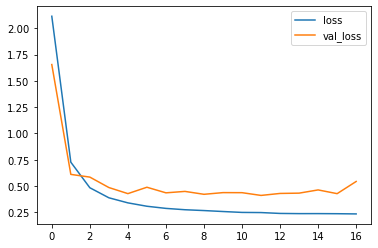

In [28]:
losses[["loss","val_loss"]].plot()

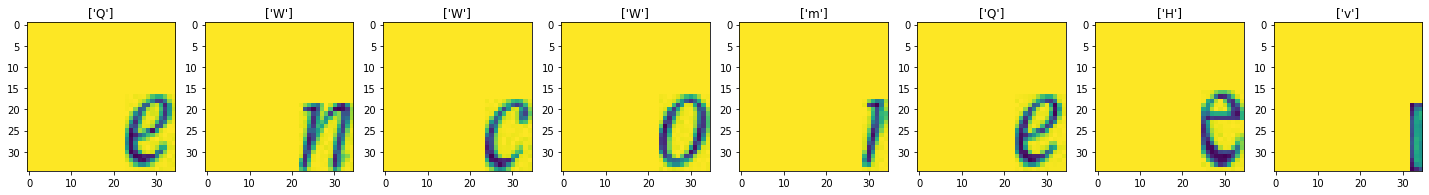

In [63]:
list_lettre=os.listdir("lettre")
plt.figure(figsize=(25,25))
for l in range(len(list_lettre)):
    img=imread(r"C:\Users\Grégoire\Documents\programmation\opencv\lettre\{}".format(list_lettre[l]))
    padx=img_shape-img.shape[0]
    pady=img_shape-img.shape[1]

    pred=np.zeros((img_shape,img_shape))
    for i in range(padx):
        pred[i,:]=255
    for j in range(pady):
        pred[:,j]=255
    
    for i in range(padx,img_shape):
        for j in range(pady,img_shape):
            pred[i,j]=img[i-padx,j-pady]
    plt.subplot(1,len(list_lettre),l+1)
    plt.imshow(pred)
    pred=pred/255
    plt.title(f"{lb.inverse_transform(model.predict(pred.reshape((1,img_shape,img_shape,1))))}")

plt.show()

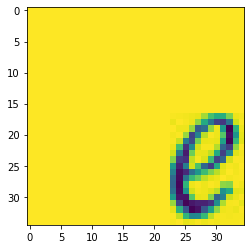

In [41]:
pred=pred/255
plt.imshow(pred)


In [42]:
lb.inverse_transform(model.predict(pred.reshape((1,img_shape,img_shape,1))))

array(['Q'], dtype='<U1')

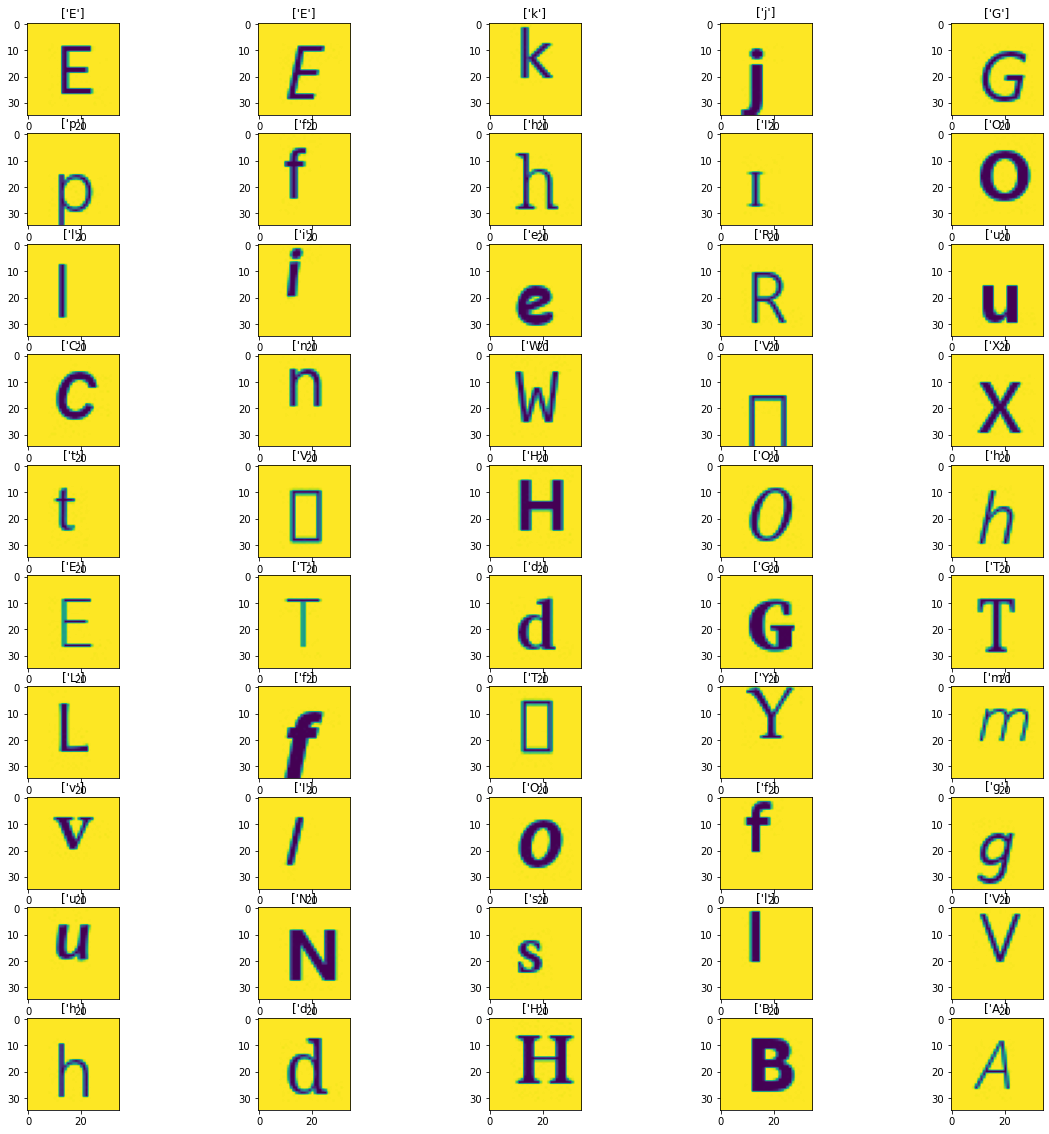

In [56]:
plt.figure(figsize=(20,20))
for i in range(50):
    
    img=X_train[i]
    plt.subplot(10,5,i+1)
    plt.imshow(img)
    plt.title(f"{lb.inverse_transform(model.predict(img.reshape((1,img_shape,img_shape,1))))}")
plt.show()

In [50]:
print(img[20:25,20:25])

[[0.99215686 0.87843137 0.         0.38823529 1.        ]
 [1.         0.87843137 0.00392157 0.38431373 1.        ]
 [1.         0.8627451  0.00392157 0.38431373 1.        ]
 [1.         0.83921569 0.00392157 0.38823529 1.        ]
 [1.         0.72941176 0.         0.38823529 0.99607843]]


In [49]:
print(pred)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.98431373 0.97254902 0.99607843]
 [1.         1.         1.         ... 0.98431373 0.98823529 0.98823529]
 [1.         1.         1.         ... 0.98823529 0.98823529 0.99215686]]
